# Loading Required Libraries

In [1]:
import pandas as pd
import missingno as msno

%matplotlib inline

# Loading Data Set

In [2]:
df = pd.read_csv('data/input.tsv', sep='\t', index_col='ID')

df.iloc[:10, :10]

,cmmc,ecog_ps,cell_markers,dna_index,lgh,lgl,percent_aneuploid,percent_plama_cells_bone_marrow,percent_plama_cells_peripherical_blood,creatinine
ID,,,,,,,,,,
MMRF1007,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,IgG,Kappa,0.0,0.6,0.0,176.800
MMRF1011,NaN,PS 1 (Restricted in physically strenuous activ...,CD138,NaN,NaN,NaN,0.0,0.9,0.0,123.760
MMRF1013,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,NaN,NaN,0.0,1.3,0.2,186.524
MMRF1014,NaN,PS 0 (Fully Active),CD117,NaN,IgA,Kappa,0.0,1.4,0.0,70.720
MMRF1015,NaN,PS 0 (Fully Active),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMRF1016,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,IgG,Lambda,0.0,2.0,0.0,86.632
MMRF1017,NaN,PS 1 (Restricted in physically strenuous activ...,CD138,1.25,IgG,Lambda,6.9,2.1,0.0,79.560
MMRF1018,NaN,PS 1 (Restricted in physically strenuous activ...,CD117,NaN,IgA,Kappa,0.0,2.1,0.0,133.484
MMRF1020,NaN,PS 0 (Fully Active),CD138,NaN,NaN,NaN,0.0,4.0,0.0,88.400


# Visualize Variables with or without Missing Values

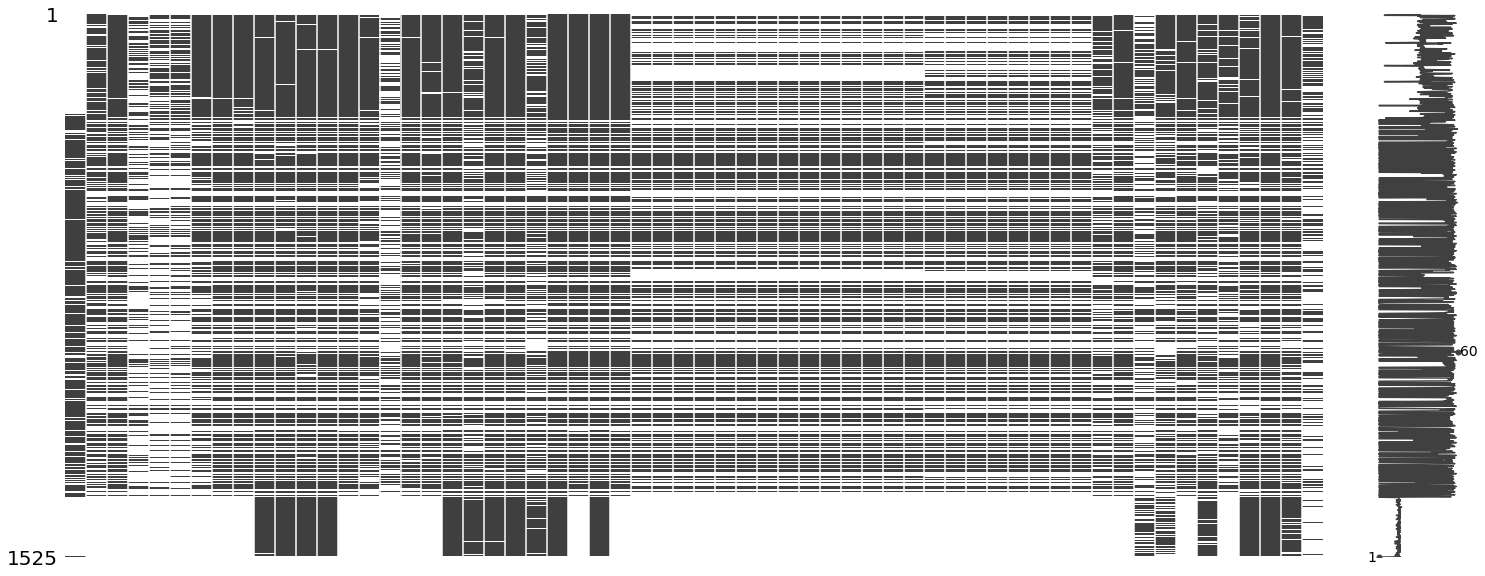

In [3]:
msno.matrix(df);

# Visualizing Variables with Less than of 10% of Missing Values

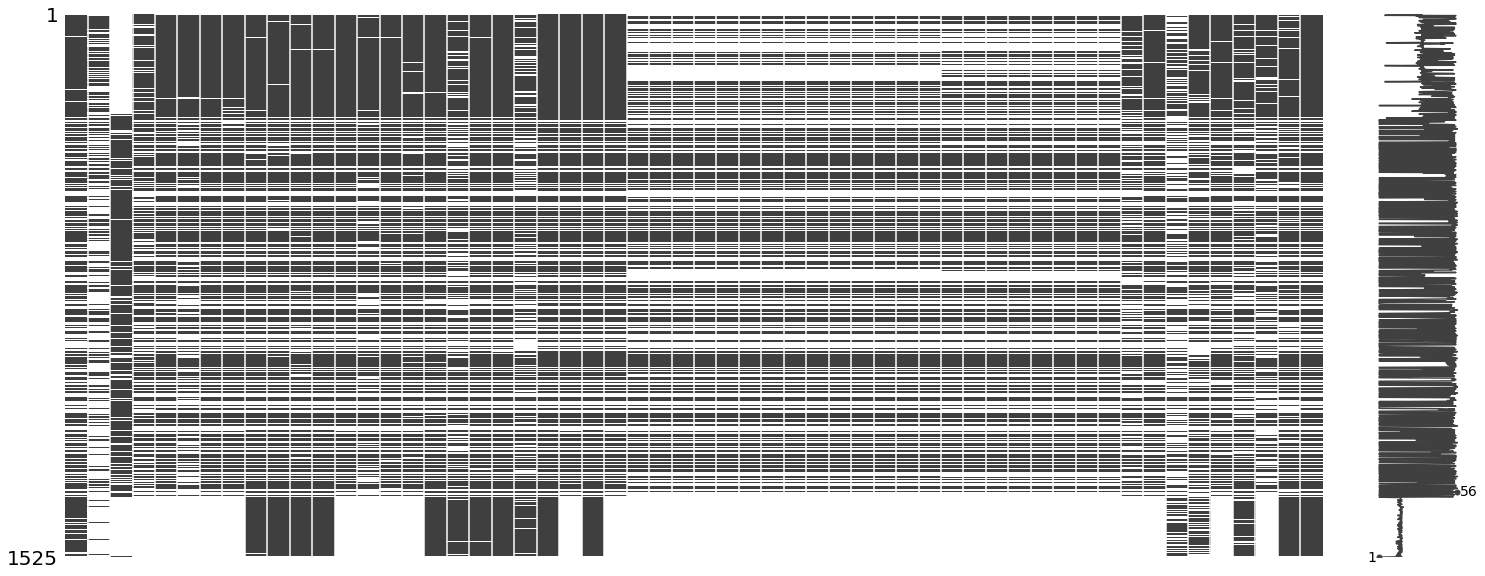

In [4]:
selected_columns = []

for c in df:
    
    series = df[c]
    
    if series.isnull().sum() / len(series) <= .6 or c in ('response_days_to_disease_progression', 'therapy_first_line'):
        selected_columns.append(c)
        
selected_columns = selected_columns[-2:] + selected_columns[:-2]

msno.matrix(df[selected_columns]);

In [5]:
clinical_description = {'variable': [], 'type': [], 'number of values': [], 'sample':[], 'nas': [], 'count': []}

for c in selected_columns:
        
    clinical_description['variable'].append(c)
    
    clinical_description['type'].append(str(df[c].dtype))
    
    nvalues = len(df[c].unique())
    
    clinical_description['number of values'].append(nvalues)
    
    clinical_description['nas'].append(df[c].isnull().sum())
    
    clinical_description['count'].append((~df[c].isnull()).sum())
    
    try:
        clinical_description['sample'].append(', '.join([str(v) for v in df[c].unique()[:min(5, nvalues)]]))
        
    except:
        clinical_description['sample'].append(None)

clinical_description = pd.DataFrame(clinical_description)

clinical_description

,variable,type,number of values,sample,nas,count
0,response_best_response_first_line,float64,3,"0.0, 1.0, nan",454,1071
1,response_days_to_disease_progression,float64,3,"0.0, 1.0, nan",965,560
2,cmmc,float64,660,"nan, 800.0, 5913.0, 22169.0, 3864.0",610,915
3,ecog_ps,object,6,PS 1 (Restricted in physically strenuous activ...,672,853
4,cell_markers,object,5,"CD117, CD138, nan, CD13, CD38",562,963
5,percent_aneuploid,float64,323,"0.0, nan, 6.9, 11.0, 15.4",671,854
6,percent_plama_cells_bone_marrow,float64,406,"0.6, 0.9, 1.3, 1.4, nan",556,969
7,percent_plama_cells_peripherical_blood,float64,94,"0.0, 0.2, nan, 34.0, 3.0",565,960
8,creatinine,float64,317,"176.8, 123.76, 186.524, 70.72, nan",401,1124
9,iss,float64,4,"3.0, 1.0, nan, 2.0",411,1114


# Exporting data set composed by variables with less than 10% of missing values

In [6]:
df[selected_columns].loc[~(df[selected_columns[0]].isnull() & df[selected_columns[1]].isnull())].to_csv('data/clinical.tsv', sep='\t', index=True)